In [1]:
pip install yfinance

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install plotly.express as px

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install pandas_datareader


     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     ----------------------------------- -- 102.4/109.5 kB 3.0 MB/s eta 0:00:01
     ----------------------------------- -- 102.4/109.5 kB 3.0 MB/s eta 0:00:01
     -------------------------------------- 109.5/109.5 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import pandas_datareader as web


In [2]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

df = pdr.get_data_yahoo('DMART.NS', start='2015-1-1', end='2022-12-31')

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [25]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


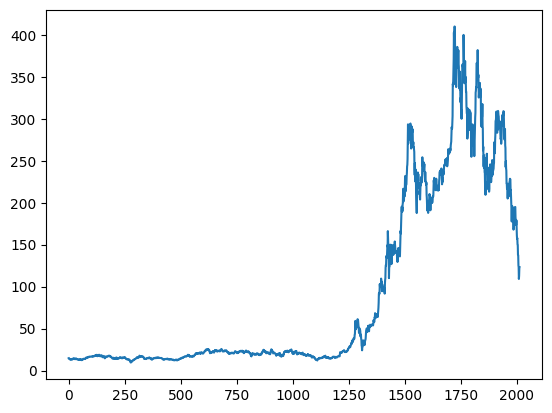

In [26]:
plt.plot(df.Close)

In [27]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2009    234.019467
2010    232.024134
2011    230.269534
2012    228.583501
2013    226.981967
Name: Close, Length: 2014, dtype: float64

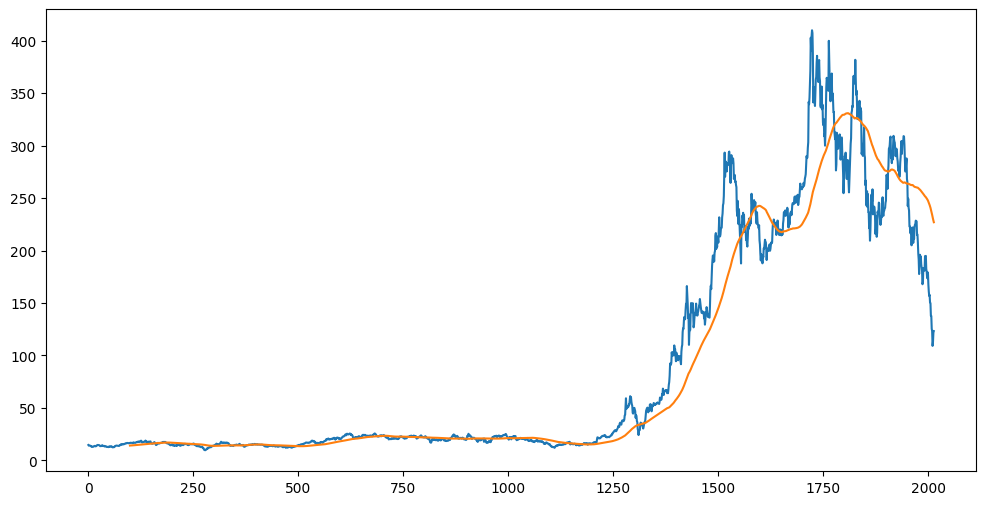

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100)

In [14]:
ma200=df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    152.1331
3268    152.0096
3269    151.8867
3270    151.7593
3271    151.6110
Name: Close, Length: 3272, dtype: float64

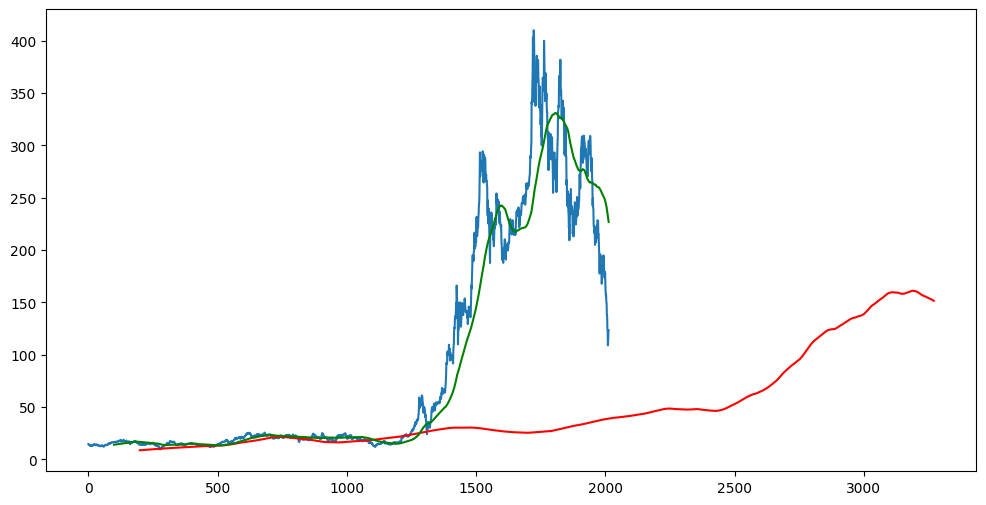

In [29]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'r')
plt.plot(ma100,'g')

In [16]:
df.shape

(3272, 7)

In [17]:
#splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [20]:
data_training.shape

(2290, 1)

In [21]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [22]:
x_train.shape

(2190, 100, 1)

In [23]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [30]:
model=Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM(units=80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [32]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50
69/69 [==============================] - 19s 198ms/step - loss: 0.0244
Epoch 2/50
69/69 [==============================] - 15s 224ms/step - loss: 0.0062
Epoch 3/50
69/69 [==============================] - 15s 220ms/step - loss: 0.0055
Epoch 4/50
69/69 [==============================] - 16s 230ms/step - loss: 0.0055
Epoch 5/50
69/69 [==============================] - 22s 316ms/step - loss: 0.0048
Epoch 6/50
69/69 [==============================] - 36s 527ms/step - loss: 0.0048
Epoch 7/50
69/69 [==============================] - 38s 554ms/step - loss: 0.0045
Epoch 8/50
69/69 [==============================] - 36s 524ms/step - loss: 0.0038
Epoch 9/50
69/69 [==============================] - 37s 539ms/step - loss: 0.0036
Epoch 10/50
69/69 [==============================] - 35s 514ms/step - loss: 0.0039
Epoch 11/50
69/69 [==============================] - 35s 503ms/step - loss: 0.0033
Epoch 12/50
69/69 [==============================] - 35s 507ms/step - loss: 0.0033
Epoch 13/50
6

In [ ]:
model.save('keras_model.h5')

In [ ]:
past_100_days=data_training.tail(100)


In [ ]:
final_df=past_100_days.append(data_testing,ignore_index= True)

<ipython-input-80-46277fdece45>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [ ]:
 final_df.head()

,Close
0,63.215000
1,61.667500
2,61.195000
3,57.310001
4,56.092499


In [ ]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.05656483],
       [0.04427503],
       [0.04052257],
       [0.00966905],
       [0.        ],
       [0.04469198],
       [0.0419918 ],
       [0.06764351],
       [0.04639945],
       [0.0604364 ],
       [0.05940397],
       [0.03283898],
       [0.04082037],
       [0.03383169],
       [0.07564478],
       [0.06960907],
       [0.08279233],
       [0.08660432],
       [0.09704768],
       [0.12444655],
       [0.11924474],
       [0.12373183],
       [0.11600849],
       [0.10435404],
       [0.08735879],
       [0.10270616],
       [0.10058174],
       [0.11634604],
       [0.11674315],
       [0.10762998],
       [0.12579669],
       [0.13784818],
       [0.12845715],
       [0.13657754],
       [0.14531341],
       [0.15140868],
       [0.15758333],
       [0.17027024],
       [0.17995914],
       [0.17281159],
       [0.16534636],
       [0.16909885],
       [0.16546548],
       [0.17985983],
       [0.1762464 ],
       [0.18833764],
       [0.18361231],
       [0.187

In [ ]:
input_data.shape

(705, 1)

In [ ]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(605, 100, 1)
(605,)


In [ ]:
y_predicted=model.predict(x_test)


19/19 [==============================] - 2s 86ms/step


In [ ]:
y_test

array([0.43695282, 0.44977866, 0.42315407, 0.4520222 , 0.46790562,
       0.46709158, 0.46470905, 0.47229339, 0.47344491, 0.49383529,
       0.54224001, 0.55405326, 0.54585344, 0.55933451, 0.5473227 ,
       0.54571451, 0.57932771, 0.62014809, 0.59807015, 0.5145234 ,
       0.51515875, 0.45051326, 0.48625094, 0.45583419, 0.44400106,
       0.4706852 , 0.47211471, 0.44503346, 0.43081779, 0.40302181,
       0.42875299, 0.44249211, 0.40524554, 0.41398141, 0.44622473,
       0.46750851, 0.4605992 , 0.47425895, 0.48204185, 0.45210157,
       0.47973874, 0.45321347, 0.46846153, 0.46758794, 0.48347136,
       0.54247825, 0.51627059, 0.51698537, 0.51317333, 0.49975182,
       0.47560908, 0.48775989, 0.4826772 , 0.47378246, 0.46814386,
       0.46822329, 0.4805329 , 0.43764767, 0.47036753, 0.4190641 ,
       0.41834931, 0.43161201, 0.46742907, 0.49983126, 0.4971311 ,
       0.47830923, 0.47552965, 0.50348443, 0.50126077, 0.50165788,
       0.50991726, 0.50269028, 0.49188955, 0.49673399, 0.48640

In [ ]:
y_predicted

array([[0.33915842],
       [0.35233012],
       [0.36761534],
       [0.38372916],
       [0.39975172],
       [0.4151647 ],
       [0.42958802],
       [0.44267964],
       [0.45425057],
       [0.46417403],
       [0.47264332],
       [0.4805086 ],
       [0.48861796],
       [0.49737015],
       [0.5069218 ],
       [0.51696575],
       [0.5269744 ],
       [0.5368277 ],
       [0.54695785],
       [0.5573554 ],
       [0.56660694],
       [0.57335573],
       [0.57595015],
       [0.57401323],
       [0.5675849 ],
       [0.5570075 ],
       [0.54317653],
       [0.52734834],
       [0.5105079 ],
       [0.49336633],
       [0.47622126],
       [0.45968372],
       [0.44458392],
       [0.43117756],
       [0.41962892],
       [0.4103765 ],
       [0.40407112],
       [0.40104   ],
       [0.40145355],
       [0.40522403],
       [0.41156086],
       [0.4198039 ],
       [0.4289813 ],
       [0.43834922],
       [0.44730556],
       [0.4556124 ],
       [0.46391732],
       [0.472

In [ ]:
scaler.scale_

array([0.00794171])

In [ ]:
scale_factor=1/0.00794171
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

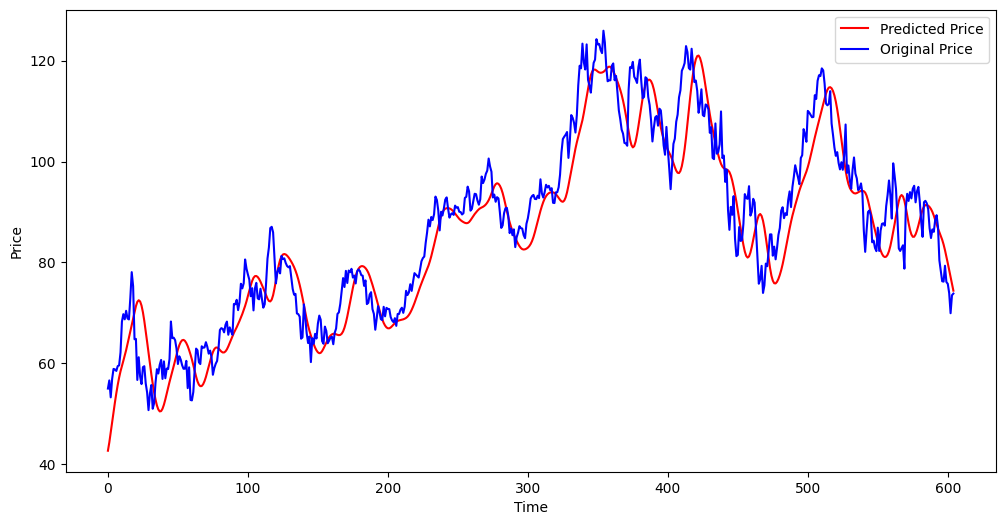

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_predicted,'r',label='Predicted Price')
plt.plot(y_test,'b',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [1]:
plt.figure(figsize=(12,6))
plt.plot(y_predicted,'r',label='Predicted Price')
plt.plot(y_test,'b',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()



NameError: name 'plt' is not defined

In [3]:
import talib as ta
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
import datatime as dt

ModuleNotFoundError: No module named 'talib'

In [ ]:
data=web.DataReader('AAPL','yahoo',start,end)

In [ ]:
data

In [ ]:
data['SMA_100']=ta.SMA(data['Close'],100)

In [ ]:
plt.plot(data['Close'])
plt.plot(data['SMA_100'])

In [ ]:
data['EMA_100']=ta.EMA(data['Close'],100)

In [ ]:
plt.plot(data['Close'])
plt.plot(data['EMA_100'])

In [ ]:
data['RSI']=ta.RSI(data['Close'])

In [ ]:
fig,axs=plt.subplot(2,1,gridspec_kw={'height_ratios':[3,1]},figsize=(10,6))
axs[0].plot(data['Close'])
axs[1].axhline(y=60,color='r',linestyle='--')
axs[1].axhline(y=40,color='g',linestyle='--')
axs[1].plot(data['RSI'],color='orange')

In [ ]:
data['LINEARREG']=ta.LINEARRED(data['Close'],200)

In [ ]:
plt.plot(data['Close'])
plt.plot(data['LINEARREG'])

In [ ]:
start=dt.datetime(2008,1,1)

end=dt.datetime.now()

data=web.DataReader('AAPL','yahoo',start,end)
macd,macd_signal,macd_hist=ta.MACD(data['Close'])

fig, axs=plt.subplot(2,1,gridspec_kw={'height_ratios':[3,1]}, figsize=(10,6))
c=['red' if cl<0 else 'green' for cl in macd_hist]

axs[0].plot(data['Close'])
axs[1].plot(macd,'b--')
axs[1].plot(macd_signal,'--',color='orange')
axs[1].plot(macd_hist.index,macd_hist,color=c)

In [ ]:
import mplfinance as mpf

fig, axs=plt.subplot(2,1,gridspec_kw={'height_ratios':[3,1]}, figsize=(10,6))

colors=mpf.make_marketcolors(up='#00ff00',down='#ff0000')

mpf_style=mpf.make_mpf_style(base_mpf_style='yahoo',marketcolors=colors)

mpf.plot(data,type='candle',ax=axs[0],style=mpf_style)

